We are learning about Keras:-
1) It an open source lib for creating NN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
print(dir(tf.keras.layers))
# https://keras.io/api/


['AbstractRNNCell', 'Activation', 'ActivityRegularization', 'Add', 'AdditiveAttention', 'AlphaDropout', 'Attention', 'Average', 'AveragePooling1D', 'AveragePooling2D', 'AveragePooling3D', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BatchNormalization', 'Bidirectional', 'CategoryEncoding', 'CenterCrop', 'Concatenate', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'ConvLSTM1D', 'ConvLSTM2D', 'ConvLSTM3D', 'Convolution1D', 'Convolution1DTranspose', 'Convolution2D', 'Convolution2DTranspose', 'Convolution3D', 'Convolution3DTranspose', 'Cropping1D', 'Cropping2D', 'Cropping3D', 'Dense', 'DenseFeatures', 'DepthwiseConv1D', 'DepthwiseConv2D', 'Discretization', 'Dot', 'Dropout', 'ELU', 'EinsumDense', 'Embedding', 'Flatten', 'GRU', 'GRUCell', 'GaussianDropout', 'GaussianNoise', 'GlobalAveragePooling1D', 'GlobalAveragePooling2D', 'GlobalAveragePooling3D', 'GlobalAvgPool1D', 'GlobalAvgPool2D', 'GlobalAvgPool3D', 'GlobalMaxPool1D', 'GlobalMaxPool2D', 'GlobalMaxPo

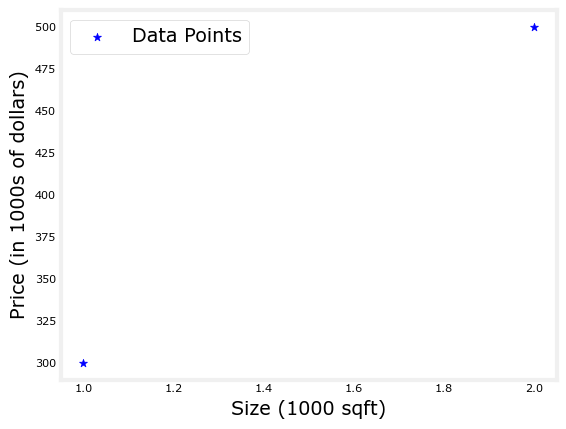

In [4]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='*', c='b', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [5]:
print(X_train.shape)

(2, 1)


Regression/Linear Model


In [6]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

In [7]:
linear_layer.get_weights()

[]

In [8]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)


tf.Tensor([[1.02]], shape=(1, 1), dtype=float32)


In [9]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[1.02]], b=[0.]


In [10]:
set_w = np.array([[200]])
set_b = np.array([200])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([200.], dtype=float32)]


In [11]:
print(X_train,set_w,set_b)
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)


[[1.]
 [2.]] [[200]] [200]
tf.Tensor([[400.]], shape=(1, 1), dtype=float32)
[[400.]]


In [12]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

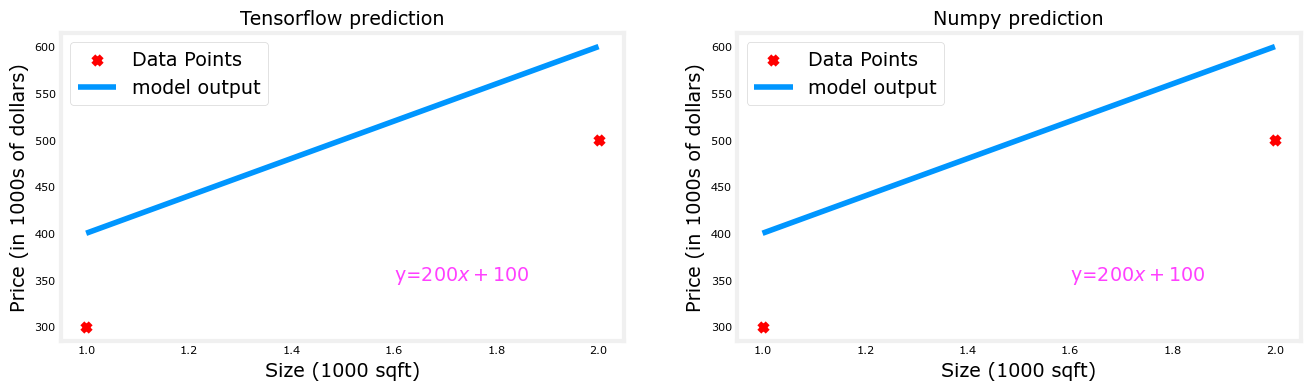

In [13]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

<h1>We are starting with keras here we are working on neuron</h1>

The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Let's set $w$ and $b$ to some known values and check the model.


In [26]:
#Dataset
X_t = np.array([0, 1, 2, 3, 4, 5]) # This is normal array
print(X_t)
print(X_t.shape)

Y_tr = np.array([[0, 1, 2, 3, 4, 5]])
print(Y_tr)
print(Y_tr.shape)

X_train = np.array([0, 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # reshape will turn (1,6) i.e 1 row 6 col into transpose i.e 6 row 1 col
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
print(X_train.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
(6, 1)
[[0 1 2 3 4 5]]
(1, 6)
(6, 1)


In [31]:
pos = Y_train == 1
neg = Y_train == 0
print(pos)
print(neg)
print(X_train[pos])
print(X_train[neg])

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]]
[[ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]]
[3. 4. 5.]
[0. 1. 2.]


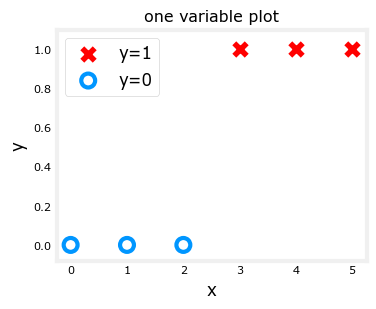

In [39]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1) #This to control vertical i.e. y axis level start from y = -0.08 end at y = 1.1
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.   
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of constructing these models.

In [40]:
model = Sequential([tf.keras.layers.Dense(1, input_dim=1 , activation = 'sigmoid', name='L1')])
print(model)

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [42]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.83]] [0.]
(1, 1) (1,)


In [44]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [46]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 39ms/step
[[0.01]]
[[0.01]]


1/1 [==============================] - 0s 31ms/step


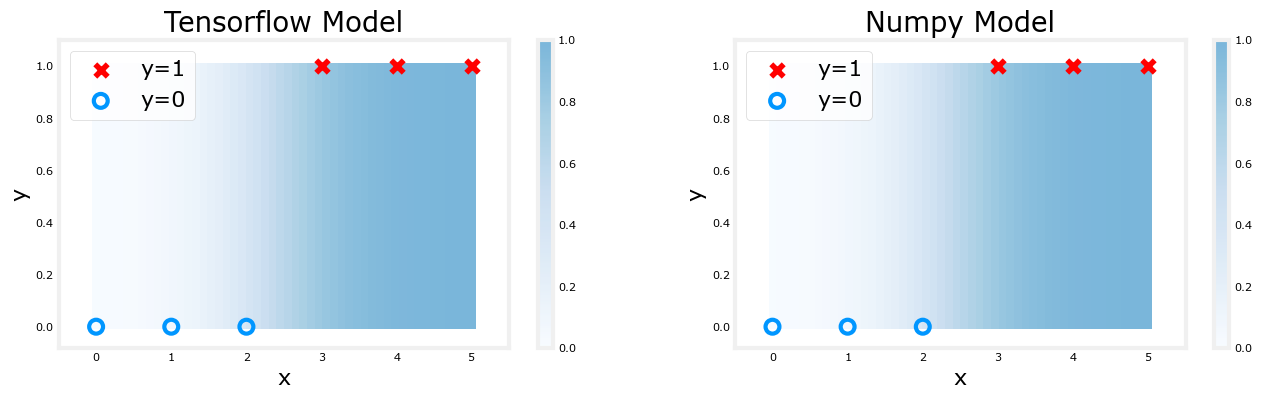

In [47]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)